<a href="https://colab.research.google.com/github/DeodatoBastos/Imersao_Dados/blob/main/ImersaoDados_4_Pesquisa_de_Imoveis_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalando e Importando bibliotecas

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 13.5 MB/s 
     |████████████████████████████████| 16.7 MB 315 kB/s 
     |████████████████████████████████| 6.3 MB 42.5 MB/s 


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from scipy import stats
from folium import Choropleth, Marker, Map
from folium.plugins import MarkerCluster

url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

## Visão geral do *dataset*

In [4]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


## Metragem de cada bairro

Para entender melhor os dados que estamos trabalhando é preciso buscar relações entre os tipos de dados, colunas. Assim, faz-se a metrage para cada bairro, para saber como que essa *feature* está distribuida pelos bairros

In [6]:
metragem_por_bairro = dados.groupby(by='Bairro')['Metragem']
media_metragem = metragem_por_bairro.mean().sort_values(ascending=False)
media_metragem

Bairro
Sítio Represa                         37000.000000
Vila Castelo                           2850.000000
Jardim Guedala                         2486.640199
Jardim das Camélias                    1700.000000
Chácara Flora                          1260.727273
                                          ...     
Cidade Antônio Estevão de Carvalho       57.500000
Jardim Nova Germania                     57.000000
Jardim Benfica                           48.000000
Vila Leonor                              46.000000
Vila Guaca                               10.000000
Name: Metragem, Length: 701, dtype: float64

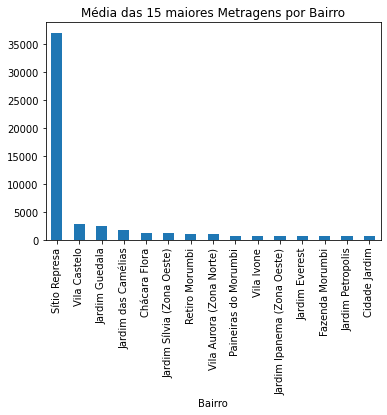

In [7]:
media_metragem.head(15).plot.bar(title='Média das 15 maiores Metragens por Bairro')

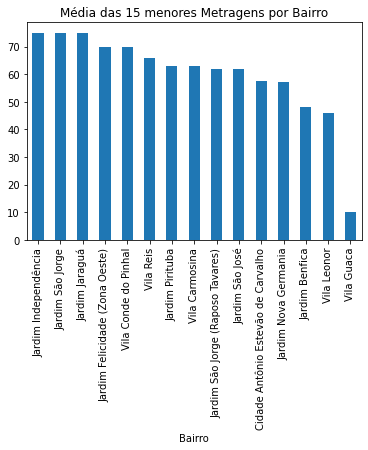

In [8]:
media_metragem.tail(15).plot.bar(title='Média das 15 menores Metragens por Bairro')

## Filtros por bairros

Dentro do *dataset* é importante filtrar os dados para saber informações específicas de uma determinada região, ou para também entender qual a distribuição de uma *feature* em relação a outra.

Nas células abaixo há duas formas de fazer essa filtragem

In [9]:
bairro_cidade_jardim = dados.loc[lambda df: df['Bairro'] == 'Cidade Jardim', :]
bairro_cidade_jardim.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
8029,Avenida das Magnólias,Cidade Jardim,São Paulo,855,4,4,10,R$ 11.000.000
3845,NaN,Cidade Jardim,São Paulo,685,5,5,4,R$ 4.500.000
4766,NaN,Cidade Jardim,São Paulo,704,4,7,4,R$ 6.000.000
1460,Rua Engenheiro Guimarães Valadão,Cidade Jardim,São Paulo,425,4,6,2,R$ 3.800.000
2256,NaN,Cidade Jardim,São Paulo,350,3,4,4,R$ 3.800.000
2603,Avenida Amarilis,Cidade Jardim,São Paulo,661,4,7,8,R$ 5.900.000
9304,NaN,Cidade Jardim,São Paulo,600,4,7,6,R$ 3.000.000
1283,NaN,Cidade Jardim,São Paulo,625,4,4,6,R$ 3.000.000
220,NaN,Cidade Jardim,São Paulo,1000,5,5,8,R$ 40.000\n /Mês
6319,Rua das Begônias,Cidade Jardim,São Paulo,406,4,4,6,R$ 2.800.000


In [10]:
bairro_pacaembu = dados[dados['Bairro'] == 'Pacaembu']
bairro_pacaembu.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4577,NaN,Pacaembu,São Paulo,250,3,2,2,R$ 6.900\n /Mês
3385,NaN,Pacaembu,São Paulo,1495,5,11,40,R$ 25.000\n /Mês
5370,Rua José de Freitas Guimarães,Pacaembu,São Paulo,709,4,6,10,R$ 9.600.000
5135,Rua Almirante Pereira Guimarães,Pacaembu,São Paulo,705,5,5,16,R$ 5.897.000
2246,NaN,Pacaembu,São Paulo,450,4,5,3,R$ 4.300.000
3810,NaN,Pacaembu,São Paulo,365,4,4,6,R$ 3.100.000
9954,Rua Bragança,Pacaembu,São Paulo,285,3,4,5,R$ 2.450.000
5745,Rua José de Freitas Guimarães,Pacaembu,São Paulo,405,3,3,4,R$ 2.200.000
1789,NaN,Pacaembu,São Paulo,380,5,5,5,R$ 3.000.000
1947,NaN,Pacaembu,São Paulo,1400,3,7,10,R$ 11.000.000


## Análises sobre alguns dados

Ainda sobre entender melhor a base de dados, é preciso saber como esses dados estão distribuidos, se há valores muito discrepantes, se todos os valores estão muito próximos uns dos outros. Com essas informações pode-se tomar decisões mais acertadas no futuro, como remover dados, remover *features*, entre outros. 

Uma boa forma de ver distribuições é com um histograma, abaixo foi gerado o gráfico do número de __Vagas__, __Banheiros__, __Quartos__ e __Metragem__, pela frequência que esses valores apareciam.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4e6201f50>,
      dtype=object)

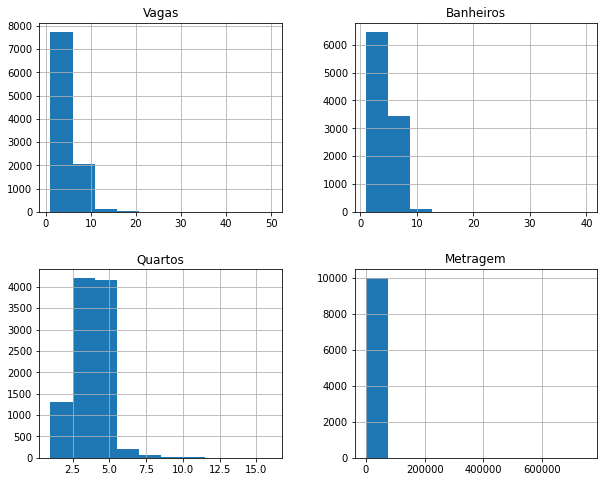

In [11]:
dados[['Vagas', 'Banheiros', 'Quartos', 'Metragem']].hist(figsize=(10, 8))

### Conclusões

A partir dos histogramas plotados, pode-se ver que a há uma concentração muito grande em pequenos valores nas colunas *Vagas*, *Banheiros*, *Quartos*.

Na coluna *Metragem* há algum dado muito destoante, visto que no histograma há valores bem altos, porém quase não há pontos com altos valores. Isso pode significar que esses pontos destoantes podem ser erros na hora de criar o *dadosset*.

Algo semelhante é visto nas outras colunas, contudo o fenômeno não é tão acentuado quanto na *Metragem*. Logo, retirar esses dados pode ser uma boa ação para evitar futuros problemas com o modelo a ser criado.

## Outros dados relevantes

Ainda sobre o entendimento da base, conhecer algumas grandezas estatísticas, como média, mediana, entre outros. Esse números melhoram a visão sobre a distribuição das *features*, além de não depender apenas de observar gráficos

In [12]:
dt_filter = dados[['Quartos', 'Banheiros', 'Vagas']]
dt_filter.head()

,Quartos,Banheiros,Vagas
0,4,8,6
1,4,4,4
2,4,3,2
3,3,2,4
4,3,2,2


In [13]:
mean_list = dt_filter.mean().to_list()
median_list = dt_filter.median().to_list()
min_list = dt_filter.min().to_list()
max_list = dt_filter.max().to_list()
std_list = dt_filter.std().to_list()

In [14]:
dict_dados = {'Media': mean_list, 'Mediana': median_list,
             'Minimo': min_list, 'Maximo': max_list,
             'Desvio_Padrao': std_list}
statistics = pd.DataFrame(data=dict_dados, index=['Quartos',  'Banheiros', 'Vagas'])
statistics

,Media,Mediana,Minimo,Maximo,Desvio_Padrao
Quartos,3.483114,3.0,1,16,1.064200
Banheiros,3.879097,4.0,1,40,1.988467
Vagas,4.097222,4.0,1,50,2.824014


## Bairros sem nome de rua

Comumente há dados faltando na base, é preciso saber alguma forma de encontrá-los e tratá-los. Esse precesso é importante, pois trabalhar com dados imcompletos pode ser problemático para as análises, visto que essa falta de informação pode gerar análises e conclusões equivocadas, por casua de um gráfico não condizente com a realidade, ou uma métrica errada.

In [15]:
ruas_sem_nome = dados[dados['Rua'].isna()]
ruas_sem_nome.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1839,NaN,Morumbi,São Paulo,1200,6,11,6,R$ 9.500.000
1748,NaN,Vila São Francisco,São Paulo,355,4,4,4,R$ 1.300.000
1976,NaN,Jardim América,São Paulo,870,5,8,14,R$ 28.000.000
5876,NaN,Mooca,São Paulo,170,3,3,2,R$ 947.000
5532,NaN,Sumarezinho,São Paulo,248,4,3,4,R$ 20.000\n /Mês
7095,NaN,Vila Nova Curuçá,São Paulo,94,1,1,1,R$ 200.038
2516,NaN,Jardim América,São Paulo,170,2,3,2,R$ 2.300.000
7815,NaN,Consolação,São Paulo,322,4,4,10,R$ 14.000\n /Mês
3728,NaN,Vila Tramontano,São Paulo,840,6,10,7,R$ 8.900.000
3327,NaN,Jardim Europa,São Paulo,504,3,3,4,R$ 18.000.000


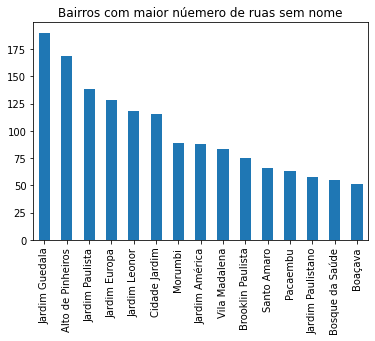

In [16]:
ruas_sem_nome['Bairro'].value_counts().head(15).plot.bar(
    title="Bairros com maior núemero de ruas sem nome")

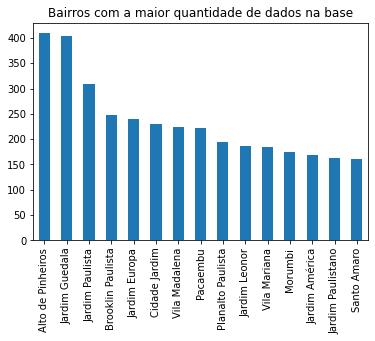

In [17]:
dados['Bairro'].value_counts().head(15).plot.bar(
    title="Bairros com a maior quantidade de dados na base")

### Conclusões

Pelos gráficos de barras, acima, vê-se que há uma relação entre a quantidade de ruas em um bairro e a quantidade de ruas sem nome no mesmo bairro. Isso parece fazer sentido, visto que quanto mais ruas há em um bairro, mais fácil ter algum dado perdido, ou que falta, nesse caso o nome da rua.

Contudo, essa relação não é diretamente procional, visto que não segue a mesma ordem que os dados originais, em quantidade de ruas, comparanando com o número de ruas sem nome.

## Trantando a coluna *Valor*

Outro passo importante ao se trabalhar com uma base de dados é saber tratar os dados. Esse processo, pode ser visto, simplificadamente, como a transformação dos dados brutos em informações que possam ser utilizadas para tomar decisões.

No caso da base que estamos trabalhando a coluna __Valor__ é uma *string*, isto é, uma frase, por isso precisamos transformá-la em um dado do tipo numérico.

In [18]:
dados_valores = dados["Valor"].str.split(expand = True)

In [19]:
dados_valores[0].unique()

array(['R$'], dtype=object)

In [20]:
len(dados_valores[1].unique()), dados_valores[1].unique()

(1038, array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
        '2.200'], dtype=object))

In [21]:
dados_valores[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [22]:
dados[['Moeda', 'Preco', 'Modalidade']] = dados_valores
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Preco,Modalidade
990,Avenida Bagiru,Boaçava,São Paulo,358,4,4,4,R$ 3.350.000,R$,3.350.000,None
4095,"Rua Pedrinhas, 167",Vila Sonia,São Paulo,400,3,4,4,R$ 4.800.000,R$,4.800.000,None
3579,Rua Maestro Chiaffarelli,Jardim Paulista,São Paulo,196,3,2,1,R$ 2.600.000,R$,2.600.000,None
9776,Rua Oscar Guanabarino,Aclimação,São Paulo,300,3,3,3,R$ 7.000\n /Mês,R$,7.000,/Mês
9811,"Rua Nova York, 0",Brooklin Paulista,São Paulo,350,4,3,3,R$ 2.400.000,R$,2.400.000,None
6099,NaN,Jardim Guedala,São Paulo,455,4,4,4,R$ 10.000\n /Mês,R$,10.000,/Mês
4204,Rua Tchecoslováquia,Interlagos,São Paulo,300,3,5,4,R$ 1.390.000,R$,1.390.000,None
2947,Rua Tucuna,Perdizes,São Paulo,270,3,4,2,R$ 1.580.000,R$,1.580.000,None
1102,Rua Sônia Ribeiro,Brooklin Paulista,São Paulo,600,4,5,4,R$ 4.000.000,R$,4.000.000,None
8859,"Rua Araripina, 180",Jardim Guedala,São Paulo,448,3,5,4,R$ 5.500.000,R$,5.500.000,None


In [23]:
dados_vendas = dados[dados["Modalidade"].isnull()]
dados_vendas.Modalidade.unique()

array([None], dtype=object)

In [24]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rua         6107 non-null   object
 1   Bairro      9146 non-null   object
 2   Cidade      9156 non-null   object
 3   Metragem    9156 non-null   int64 
 4   Quartos     9156 non-null   int64 
 5   Banheiros   9156 non-null   int64 
 6   Vagas       9156 non-null   int64 
 7   Valor       9156 non-null   object
 8   Moeda       9156 non-null   object
 9   Preco       9156 non-null   object
 10  Modalidade  0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


Removendo algumas colunas que não são úteis para a análise ou que só possuem dados repetidos

In [25]:
dados_vendas.drop(columns=["Modalidade", "Moeda", "Valor", "Cidade"], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Para facilitar a visualização e compreensão dos dados, vamos salvar a informação do preço de cada imóvel em milhões.

In [26]:
dados_vendas["Preco_em_M"] = dados_vendas["Preco"].str.replace(".", "").astype(float) / 1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


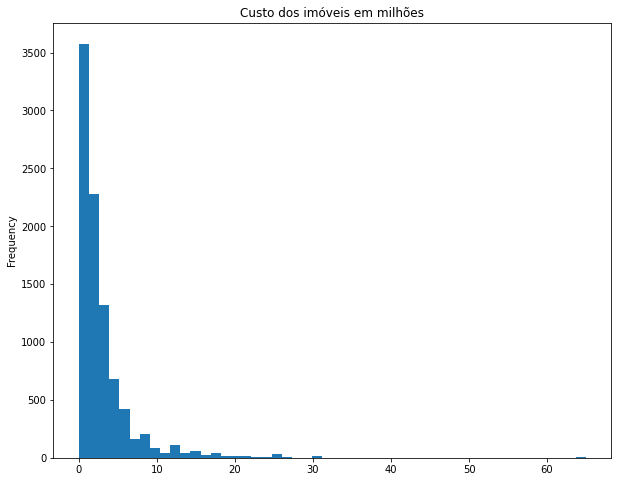

In [27]:
plt.figure(figsize=(10, 8))
dados_vendas["Preco_em_M"].plot.hist(bins=50, title="Custo dos imóveis em milhões")
plt.xlabel="Custo"
plt.ylabel="Número de imóveis"
plt.show()

In [28]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Preco_em_M
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3.05
std,7856.42,1.05,1.97,2.60,3.94
min,10.00,1.00,1.00,1.00,0.01
25%,168.00,3.00,2.00,2.00,0.89
50%,276.00,3.00,4.00,4.00,1.80
75%,450.00,4.00,5.00,5.00,3.50
max,750000.00,16.00,40.00,50.00,65.00


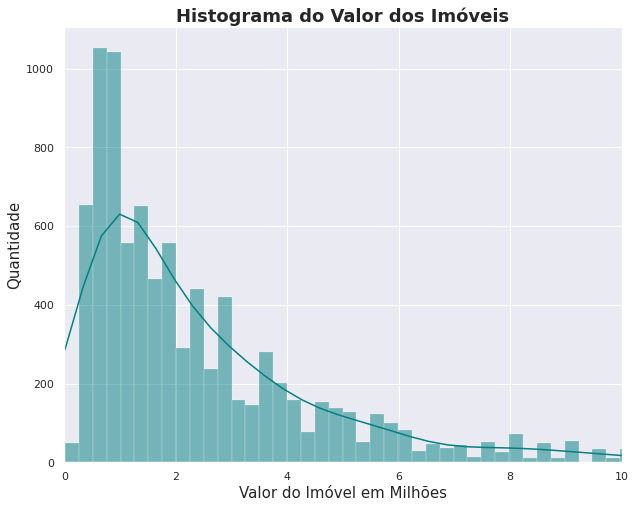

In [29]:
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=dados_vendas, x='Preco_em_M', kde=True, color='teal', palette="light:m_r")
ax.set_title('Histograma do Valor dos Imóveis', weight='bold', size=18)
ax.set_xlim(-0.01, 10)
ax.set_xlabel("Valor do Imóvel em Milhões", size=15)
ax.set_ylabel("Quantidade", size=15)
plt.show()

O histograma acima representa a maioria dos valores dos imóveis. Como pode-se ver a maior parte está concentrada em 1 milhão, com uma longa cauda, indicando que há alguns poucos imóveis bem caros.

## *Cross feature*

Uma boa forma de entendender melhor os dados de um *dataset* e assim poder tomar uma decisão melhor é juntas *features* para montar uma nova relação e assim ter uma nova visão sobre o problema.

Dessa forma, criou-se a coluna __Preco/m2__ que guarda o valor do metro quadrado de cada imóvel

In [30]:
dados_vendas["Preco/m2"] = dados_vendas["Preco_em_M"] * 1000000 / dados_vendas["Metragem"]
dados_vendas.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Metragem,Quartos,Banheiros,Vagas,Preco,Preco_em_M,Preco/m2
1937,"Rua Teviot, 50",Vila Nova Conceição,365,4,3,2,6.000.000,6.00,16438.36
5070,Rua Amílcar Barbuy,Parque São Domingos,185,4,5,3,1.200.000,1.20,6486.49
8407,Avenida Dória,Vila Alexandria,135,2,2,1,650.000,0.65,4814.81
4356,Rua Dom Duarte Leopoldo,Cambuci,548,5,6,4,1.900.000,1.90,3467.15
1211,Rua Jaguanambi,Cidade Jardim,457,5,4,3,2.680.000,2.68,5864.33
3387,NaN,City América,451,4,4,5,2.100.000,2.10,4656.32
7128,Rua Brigadeiro Gama Barcelos,Parque Jabaquara,350,3,4,4,800.000,0.80,2285.71
8912,NaN,Jardim Cidalia,130,3,1,5,800.000,0.80,6153.85
8812,Rua Rafael Carrozzo,Paraíso do Morumbi,186,3,5,4,890.000,0.89,4784.95
9163,Avenida Pablo Casals,Vila Dalva,235,3,1,6,600.000,0.60,2553.19


In [31]:
m2_por_bairro = dados_vendas.groupby(by='Bairro')["Preco/m2"].mean().sort_values(
    ascending=False).reset_index()

[]

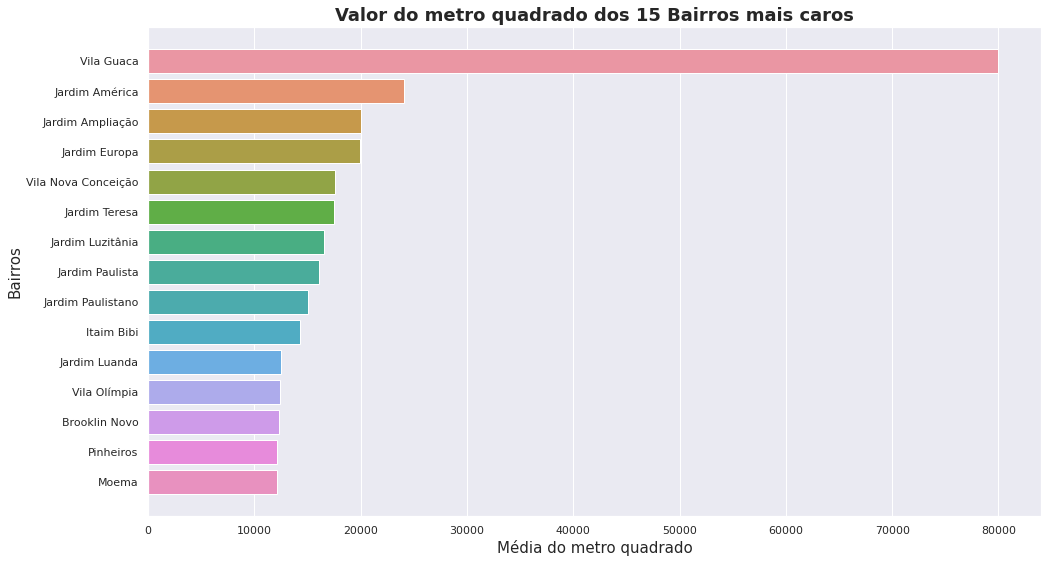

In [32]:
sns.set()
plt.figure(figsize=(16, 9))
ax = sns.barplot(y="Bairro", x="Preco/m2", data=m2_por_bairro[:15])
ax.set_title('Valor do metro quadrado dos 15 Bairros mais caros', weight='bold', size=18)
ax.set_xlabel("Média do metro quadrado", size=15)
ax.set_ylabel("Bairros", size=15)
plt.plot()

Uma outra forma de visualizar essa *feature* é fazer a média do metro quadrado para cada bairro, assim pode-se ter uma visão um pouco diferente do problema

In [33]:
dados_bairro = dados_vendas.groupby("Bairro").sum().reset_index()
dados_bairro.head()

,Bairro,Metragem,Quartos,Banheiros,Vagas,Preco_em_M,Preco/m2
0,Aclimação,19447,258,240,230,139.29,604837.39
1,Alto da Boa Vista,3351,33,41,37,19.13,46796.55
2,Alto da Lapa,23940,252,308,320,166.65,608538.25
3,Alto da Mooca,5401,66,52,73,23.68,113834.80
4,Alto de Pinheiros,158616,1453,1782,1827,1764.82,4158622.61


In [34]:
dados_bairro["Valor/m2_bairro"] = dados_bairro["Preco_em_M"] * 1000000 / dados_bairro["Metragem"]

In [35]:
dados_vendas.groupby("Bairro").mean().loc["Vila Mariana"]

Metragem      231.24
Quartos         3.39
Banheiros       3.24
Vagas           2.95
Preco_em_M      1.77
Preco/m2     7913.15
Name: Vila Mariana, dtype: float64

In [36]:
dados_bairro[dados_bairro["Bairro"] == "Vila Mariana"]

,Bairro,Metragem,Quartos,Banheiros,Vagas,Preco_em_M,Preco/m2,Valor/m2_bairro
569,Vila Mariana,39079,573,547,499,299.33,1337323.16,7659.51


Como pode ser visto, o valor do Preço por metro quadrado foi um pouco diferente para os dois métodos

In [37]:
top_bairros = dados_vendas["Bairro"].value_counts()[:15].index

Text(0.5, 0, 'Preço Metro quadrado por Bairro')

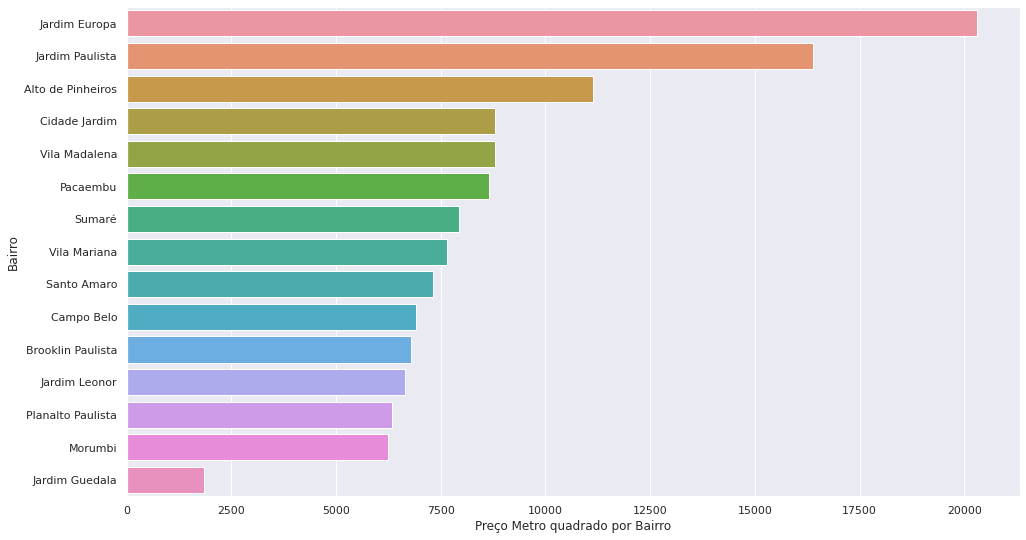

In [38]:
plt.figure(figsize=(16, 9))
ax = sns.barplot(y="Bairro", x="Valor/m2_bairro", data=dados_bairro.query(
    "Bairro in @top_bairros").sort_values(by="Valor/m2_bairro", ascending=False))
ax.set_xlabel("Preço Metro quadrado por Bairro")

### Conclusões

O primeiro colocado é bem superior ao demais, o que indica que há alguns problemas na base. Isso é justificado porque não é esperado uma diferença tão discrepante entre os preços do primeiro para o segundo mais caro. Além disso, como não houve muitos tratamentos dos dados é de se esperar que eles ainda estejam com algumas incoerências.

Com a segunda forma de analisar o preço médio do m² por bairro, vê-se uma distribuição bem diferente da original, mesmo com alguns bairros tendo custo muito alto, não há uma discrepância grande. Isso pode indicar que a segunda forma está mais próxima da realidade, mas ainda é preciso tratar alguns dados estranho, que estão muito destoantes dos demais.

## Buscando *outliers* e analisando melhor alguns dados

Como já dito anteriormente, entender a base de dados e o problema é crucial. Um dos passos desse entendimento é remover valores muito distoante dos demais, os *outliers*. Uma excelênte forma de visualizar eles é por meio do gráfico de caixas, o qual nos motra a distribuição dos valores em 25%, 50% e 75%, partindo disso também é possível estimar valores muito discrepantes, os quais são identificados com pontos.

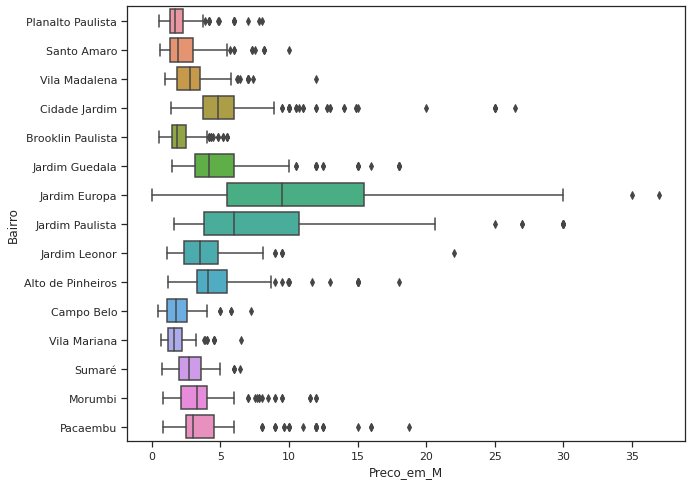

In [39]:
sns.set_theme(style="ticks")

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y="Bairro", x="Preco_em_M", data=dados_vendas.query(
    "Bairro in @top_bairros and Preco_em_M < 60"))
plt.show()

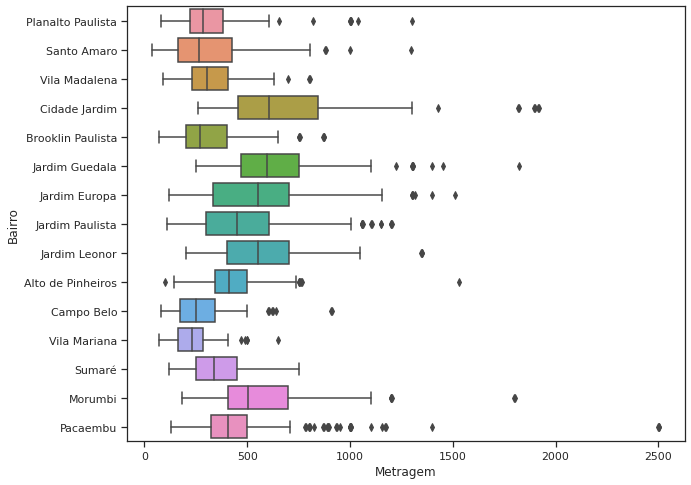

In [40]:
sns.set_theme(style="ticks")

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y="Bairro", x="Metragem", data=dados_vendas.query(
    "Bairro in @top_bairros and Metragem < 30000"))
plt.show()

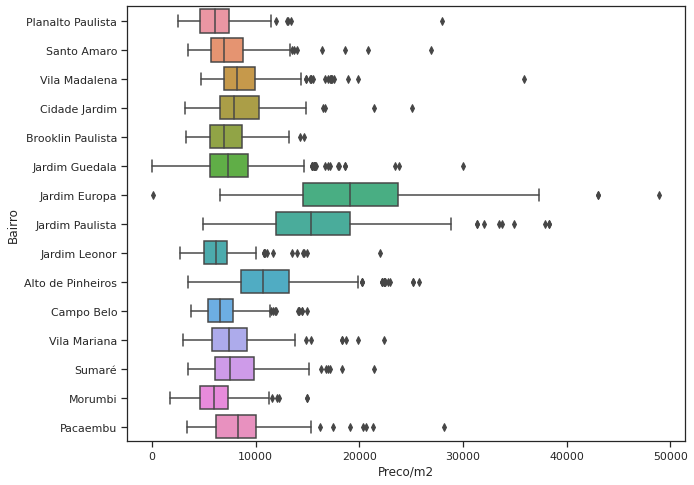

In [41]:
sns.set_theme(style="ticks")

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y="Bairro", x="Preco/m2", data=dados_vendas.query("Bairro in @top_bairros"))
plt.show()

### Conclusões

Em todos os gŕaficos gerados há muitos valores distoantes, principalmente que são maiores que os demais. Com isso, pode-se traçar alguns filtros para remover esses dados da base, assim temos informações mais limpas e tentamos transformar em algo mais próximo da realidade.

## Adicionando mais dados ao projeto

Como visto quanto mais dados se têm melhor fica o seu entendimento do problema. Assim, é importante buscar dados públicos para confirmar as suas teses, verificar mais tendências ou trazer novos pontos de vista para a questão

In [42]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"

dados_ibge = pd.read_csv(ibge_url, sep=";", encoding='utf_8', decimal=',',
                         thousands='.')

# removendo colunas com um único valor
dados_ibge.drop(columns=["Cod_Grandes Regi�es",  "Nome_Grande_Regiao", "Nome_da_micro",
                "Cod_UF", "Cod_meso", "Nome_da_meso", "Cod_micro", "Nome_do_distrito",
                "Cod_RM", "Nome_da_RM", "Cod_municipio", "Cod_distrito", "Nome_da_UF ",
                "Cod_subdistrito", "Nome_do_subdistrito", "Cod_bairro","Nome_do_bairro",
                "Situacao_setor", "Tipo_setor", "Nome_do_municipio"],
                inplace=True, axis=1)

dados_ibge.dropna(how='all', axis=1, inplace=True)

dados_ibge.replace('�','A', regex=True, inplace=True)

In [43]:
dados_ibge.sample(5)

,Cod_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
17391,355030892000038,177.00,591.00,3.34,3.40,914.97,667759.23,952.65,659314.25,635.02,470974.56,888.68,433581.67
1129,355030811000185,190.00,684.00,3.60,2.39,918.57,1182717.01,1203.65,1206803.69,704.19,835440.82,1076.33,876506.32
8404,355030843000206,162.00,547.00,3.38,2.50,866.02,944617.48,1140.61,930816.70,600.17,579253.76,982.68,572524.82
8738,355030844000135,184.00,676.00,3.67,3.61,831.64,541749.49,1055.32,450779.23,528.13,426237.78,963.66,357818.32
5800,355030831000090,175.00,590.00,3.37,2.15,874.11,7867506.65,1738.30,14215544.42,616.39,3458285.65,1293.05,6392803.85


In [44]:
dados_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Cod_setor  18363 non-null  int64  
 1   V001       18333 non-null  float64
 2   V002       18333 non-null  float64
 3   V003       18333 non-null  float64
 4   V004       18333 non-null  float64
 5   V005       18333 non-null  float64
 6   V006       18333 non-null  float64
 7   V007       18324 non-null  float64
 8   V008       18324 non-null  float64
 9   V009       18363 non-null  float64
 10  V010       18363 non-null  float64
 11  V011       18352 non-null  float64
 12  V012       18352 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.8 MB


In [45]:
enderecos = pd.read_csv("/content/drive/MyDrive/sp_setores_censitarios/enderecos.csv")
enderecos.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.00,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.00,-30.86,-55.55


In [46]:
enderecos_sp = enderecos.query("sigla_uf == 'SP' ")
enderecos_sp.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35


In [47]:
enderecos_sp["rua"] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]
enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip()
enderecos_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini


Removendo os números das ruas da base de dados "dados_vendas"

In [48]:
dados_vendas["rua"] = dados_vendas["Rua"].str.extract(r'(^[\w ]+)')[:10]
dados_vendas["rua"] = dados_vendas["rua"].str.lower().str.strip()
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rua,Bairro,Metragem,Quartos,Banheiros,Vagas,Preco,Preco_em_M,Preco/m2,rua
0,"Avenida Itacira, 255",Planalto Paulista,1000,4,8,6,7.000.000,7.00,7000.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,496,4,4,4,3.700.000,3.70,7459.68,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,125,4,3,2,380.000,0.38,3040.00,rua alba valdez
3,NaN,Jardim Morumbi,310,3,2,4,685.000,0.69,2209.68,NaN
4,"Rua Tobias Barreto, 195",Mooca,100,3,2,2,540.000,0.54,5400.00,rua tobias barreto


In [49]:
dados_geo = pd.merge(left=dados_vendas,
                      right=enderecos_sp[["rua", "cep", "latitude", "longitude"]], 
                      how = "left", left_on= "rua", right_on="rua").drop_duplicates(
                          subset=dados_vendas.columns).query("cep > 0")
dados_geo

,Rua,Bairro,Metragem,Quartos,Banheiros,Vagas,Preco,Preco_em_M,Preco/m2,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,1000,4,8,6,7.000.000,7.00,7000.00,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,496,4,4,4,3.700.000,3.70,7459.68,rua aurelia perez alvarez,4642020.00,-23.64,-46.69
6,Rua Alba Valdez,Jardim Reimberg,125,4,3,2,380.000,0.38,3040.00,rua alba valdez,4845200.00,-23.75,-46.70
7,NaN,Jardim Morumbi,310,3,2,4,685.000,0.69,2209.68,NaN,18125000.00,-23.53,-47.26
26,"Rua Tobias Barreto, 195",Mooca,100,3,2,2,540.000,0.54,5400.00,rua tobias barreto,13474663.00,-22.70,-47.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173078,Avenida Odila,Planalto Paulista,267,3,6,4,1.500.000,1.50,5617.98,NaN,18125000.00,-23.53,-47.26
173097,Rua Tapuçu,Vila Sofia,95,2,2,2,665.000,0.67,7000.00,NaN,18125000.00,-23.53,-47.26
173116,Rua Guararema,Bosque da Saúde,605,8,7,5,2.300.000,2.30,3801.65,NaN,18125000.00,-23.53,-47.26
173135,Rua Estero Belaco,Vila da Saúde,205,3,3,6,1.050.000,1.05,5121.95,NaN,18125000.00,-23.53,-47.26


In [50]:
setor_censo = gpd.read_file("/content/drive/MyDrive/sp_setores_censitarios/35SEE250GC_SIR.shp")
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


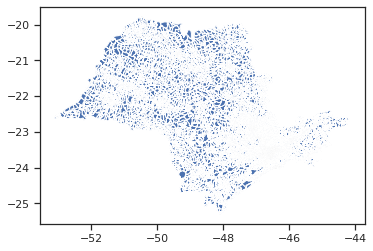

In [51]:
setor_censo.plot()

In [52]:
setor_censo_sp = setor_censo[setor_censo["NM_MUNICIP"] == "SÃO PAULO"]

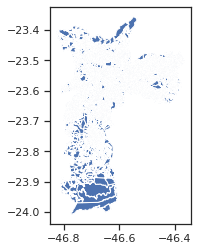

In [53]:
setor_censo_sp.plot()

In [54]:
# dados_geo["Point"] = ""

# for i in dados_geo.index:
#     dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])

# dados_geo["setor_censo"] = dados_geo["Point"].map(
#     lambda point: setor_censo_sp.loc[setor_censo_sp.contains(point), "CD_GEOCODI"
#     ].values).str[0].astype("int64")
# dados_geo

In [55]:
dados_geo = pd.read_csv("/content/drive/MyDrive/sp_setores_censitarios/dados_geo.csv")

In [56]:
dados_vendas_censo = dados_geo[dados_geo["setor_censo"].notnull()].merge(dados_ibge,
                              how="left", left_on="setor_censo",
                              right_on="Cod_setor" )
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,R$ 960.000,960000.00,NaN,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5316,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1500000.00,NaN,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5317,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665000.00,NaN,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5318,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1050000.00,NaN,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [57]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 5319
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            5320 non-null   object 
 1   Bairro         5312 non-null   object 
 2   Cidade         5320 non-null   object 
 3   Metragem       5320 non-null   int64  
 4   Quartos        5320 non-null   int64  
 5   Banheiros      5320 non-null   int64  
 6   Vagas          5320 non-null   int64  
 7   Valor          5320 non-null   object 
 8   Valor_anuncio  5320 non-null   float64
 9   Tipo_anuncio   0 non-null      float64
 10  Valor_mm       5320 non-null   float64
 11  Valor_m2       5320 non-null   float64
 12  rua            5320 non-null   object 
 13  cep            5320 non-null   float64
 14  latitude       5320 non-null   float64
 15  longitude      5320 non-null   float64
 16  Point          5320 non-null   object 
 17  setor_censo    5320 non-null   float64
 18  Cod_seto

In [58]:
dados_vendas_censo["Point"] = dados_vendas_censo.Point.str.replace("(", "").str.replace(
    ")", "").str.split()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [59]:
dados_vendas_censo.drop(columns=["Tipo_anuncio", "V004", "V006", "V008", "V010", "V012"]
                        , inplace=True)

## Análise dos dados por mapa

In [103]:
center = [-23.60, -46.68]
# Create a map
map_stamen = Map(location=center, tiles='Stamen Toner', zoom_start=12)

# Display the map
map_stamen

## Análise entre dados de venda e renda

Text(0, 0.5, 'Valor do imóvel por metro quadrado')

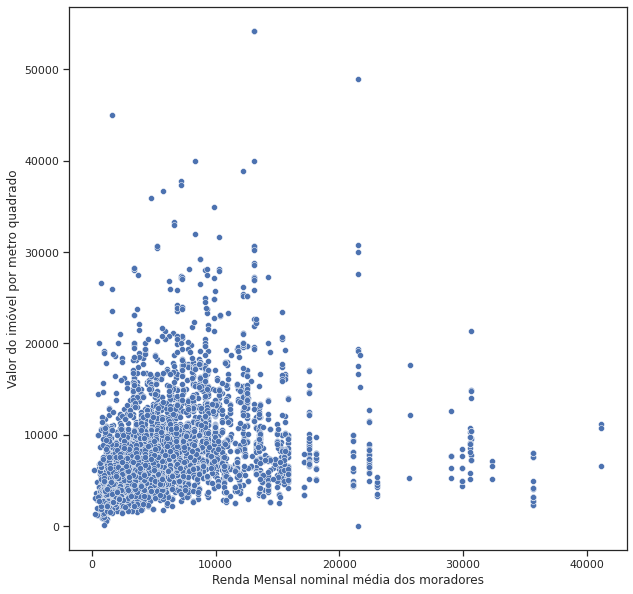

In [72]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(data=dados_vendas_censo, x="V005", y="Valor_m2")
ax.set_xlabel("Renda Mensal nominal média dos moradores")
ax.set_ylabel("Valor do imóvel por metro quadrado")

Text(0, 0.5, 'Valor do imóvel por metro quadrado')

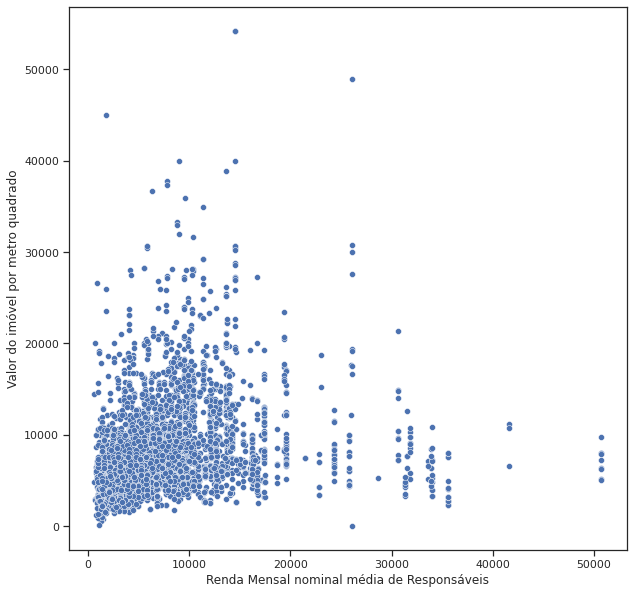

In [68]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(data=dados_vendas_censo, x="V007", y="Valor_m2")
ax.set_xlabel("Renda Mensal nominal média de Responsáveis")
ax.set_ylabel("Valor do imóvel por metro quadrado")

Text(0, 0.5, 'Valor do imóvel por metro quadrado')

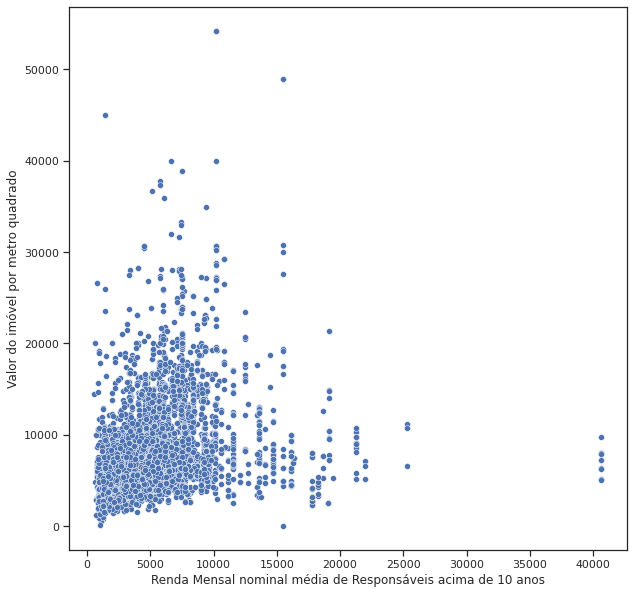

In [73]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(data=dados_vendas_censo, x="V011", y="Valor_m2")
ax.set_xlabel("Renda Mensal nominal média de Responsáveis acima de 10 anos")
ax.set_ylabel("Valor do imóvel por metro quadrado")

Text(0, 0.5, 'Metragem')

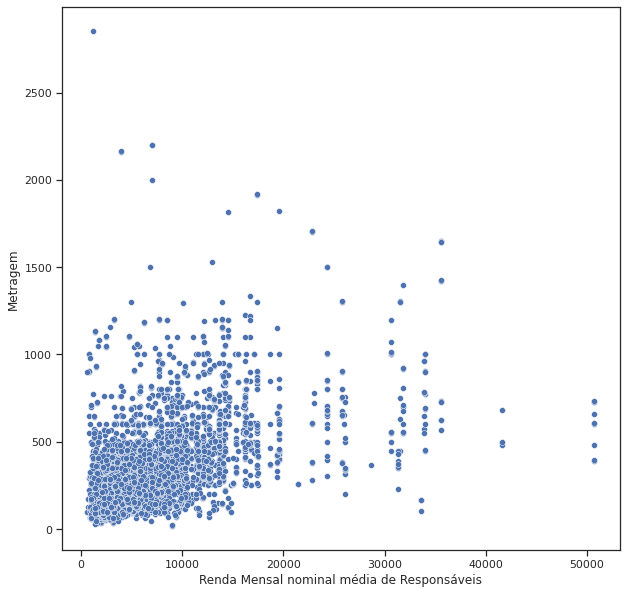

In [99]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(data=dados_vendas_censo.query("Metragem < 35000"), x="V007", y="Metragem")
ax.set_xlabel("Renda Mensal nominal média de Responsáveis")
ax.set_ylabel("Metragem")

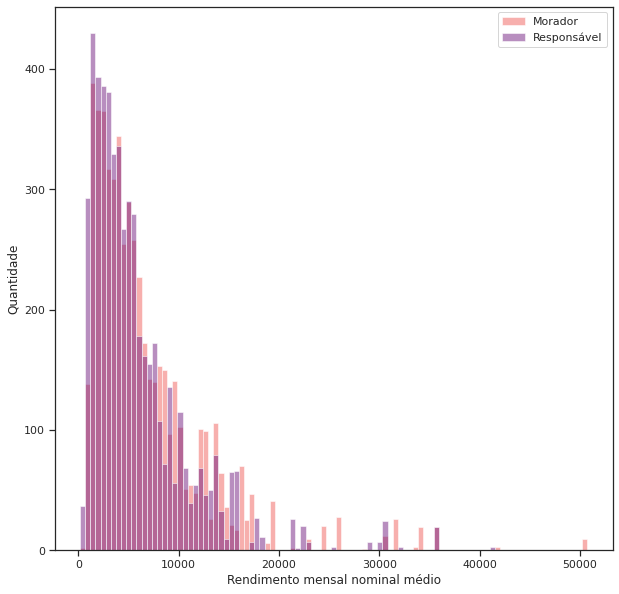

In [102]:
plt.figure(figsize=(10, 10))
ax = sns.histplot(data=dados_vendas_censo[["V005", "V007"]], palette="magma")
ax.set_ylabel("Quantidade")
ax.set_xlabel("Rendimento mensal nominal médio")
ax.legend(["Morador", "Responsável"])